# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.150664e+01     7.345237e+00
 * time: 0.0018279552459716797
     1     2.852809e+01     4.823312e+00
 * time: 0.0077037811279296875
     2     2.304195e+01     6.658162e+00
 * time: 0.01320195198059082
     3     2.045554e+01     6.915937e+00
 * time: 0.017790794372558594
     4     1.925819e+01     6.247312e+00
 * time: 0.02211785316467285
     5     1.676766e+01     5.766924e+00
 * time: 0.02665996551513672
     6     1.100125e+01     2.528840e+00
 * time: 0.03154587745666504
     7     9.934413e+00     2.840415e+00
 * time: 0.035687923431396484
     8     9.100989e+00     1.241051e+00
 * time: 0.040292978286743164
     9     8.811302e+00     9.618197e-01
 * time: 0.044847965240478516
    10     8.574116e+00     1.612808e+00
 * time: 0.0495908260345459
    11     8.538495e+00     1.284839e+00
 * time: 0.05303788185119629
    12     8.355821e+00     7.166316e-01
 * time: 0.05757784843444824
    13     8.215010e+00     6.557322e-01
 

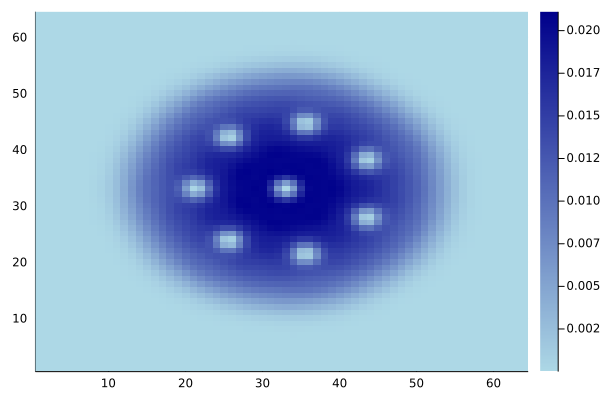

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)